### Plot zonal aspect class for HRU at different complexity levels ###
This code is used to check the calcualted zonal aspect results at different HRU discretization levels. 

In [8]:
import os
import numpy as np
import rasterio as rio
import geopandas as gpd
import geospatial_functions.utils as ut
import geospatial_functions.geospatial_analysis as ga
import geospatial_functions.geospatial_plot as gp

In [9]:
# common paths
control_file = 'control_active.txt'
root_path = ut.read_from_control(control_file, 'root_path')
source_path = ut.read_from_control(control_file, 'source_path')
domain_name = ut.read_from_control(control_file, 'domain_name')
domain_path = os.path.join(root_path, domain_name)
plot_path = os.path.join(domain_path, 'plot')

In [11]:
# domain data
domain_gru_prj_shp = ut.specify_file_path(control_file, 'domain_gru_prj_shp')
gruNo_field = ut.read_from_control(control_file, 'gruNo_field')
domain_stream_shp = ut.specify_file_path(control_file, 'domain_stream_shp')  

#### Define HRU complexity levels ####
level 0: GRU = HRU. <br>
level 1: use only elevation bands in HRU generation.<br>
level 2a: use elevation bands and landcover classes in HRU generation.<br>
level 2b: use elevation bands and radiation classes in HRU generation.<br>
level 3a: use elevation bands, radiation bands, landcover classes in HRU generation.<br>
level 3b: nested. radiation bands are generated based on level 2a HRU.<br>

In [12]:
level_list = ['0','1','2a','2b','3a','3b'] # list of hru complexity levels

#### 1. Classify HRU zonal aspect ####

In [14]:
# classify aspect into 8 classes
for level in level_list:

    print('--- Complexity level %s ---' %(level))

    hru_str = 'hru'+'_lev' + str(level)
    hru_elmn_str = hru_str+'_elmn'   
    hru_vector_elmn = os.path.join(domain_path, hru_elmn_str+'.shp')  

    hru_aspect_raster = os.path.join(domain_path, os.path.basename(hru_vector_elmn).split('.shp')[0]+'_attrb_aspect.tif') 
    aspect_class_raster = os.path.join(domain_path, os.path.basename(hru_aspect_raster).split('.tif')[0]+'_class.tif')        
    ga.classify_aspect(hru_aspect_raster, 8, aspect_class_raster)

--- Complexity level 0 ---
--- Complexity level 1 ---
--- Complexity level 2a ---
--- Complexity level 2b ---
--- Complexity level 3a ---
--- Complexity level 3b ---


#### 2. Plot HRU zonal aspect class ####

In [15]:
# legend dictionary. dist[raster_value]=list(color,label)
legend_dict={0:["black", "Flat (0)"],
             1:["red", "North (337.5 - 22.5)"],
             2:["orange", 'Northeast (22.5 - 67.5)'],
             3:["yellow", 'East (67.5 - 112.5)'], 
             4:["lime", 'Southeast (112.5 - 157.5)'], 
             5:["cyan", 'South (157.5 - 202.5)'], 
             6:["cornflowerblue", 'Southwest (202.5 - 247.5)'], 
             7:["blue", 'West (247.5 - 292.5)'], 
             8:["purple", 'Northwest (292.5 - 337.5)']} 

label_dict = {0:"Flat (0)",
              1:"North (337.7 - 22.5)",
              2:'Northeast (22.5 - 67.5)',
              3:'East (67.5 - 112.5)', 
              4:'Southeast (112.5 - 157.5)', 
              5:'South (157.5 - 202.5)', 
              6:'Southwest (202.5 - 247.5)', 
              7:'West (247.5 - 292.5)', 
              8:'Northwest (292.5 - 337.5)'}

wgs_crs = 'epsg:4326'
figsize=(9,9*0.6) # width, height in inches
leg_ncol=2
leg_loc='upper center'
leg_bbox_to_anchor=(0.5,-0.15)

--- Complexity level 0 ---


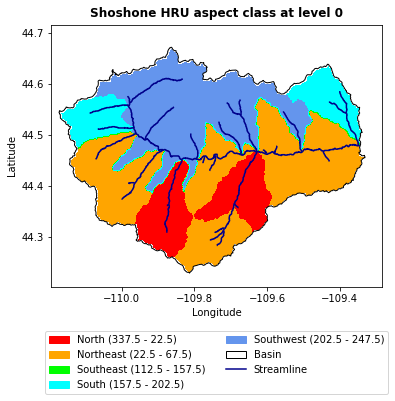

--- Complexity level 1 ---


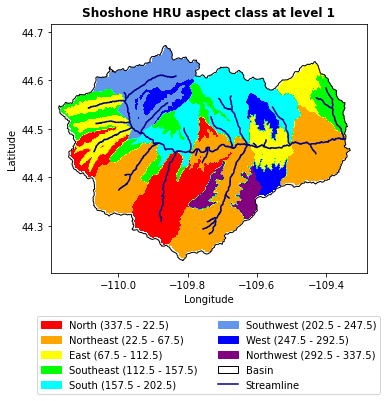

--- Complexity level 2a ---


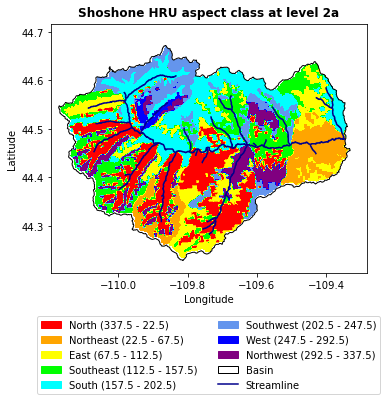

--- Complexity level 2b ---


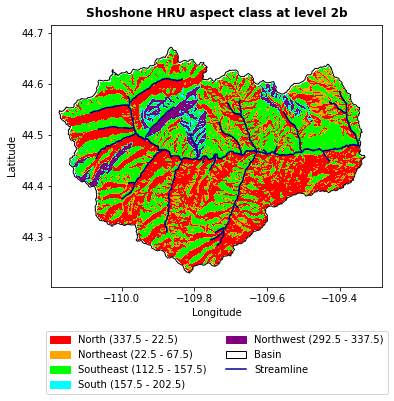

--- Complexity level 3a ---


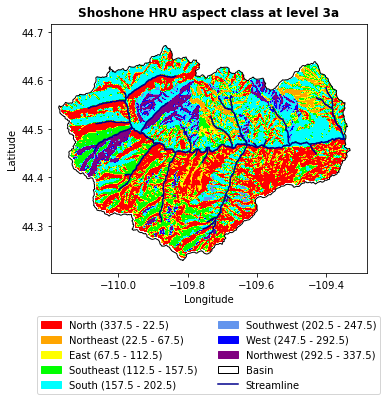

--- Complexity level 3b ---


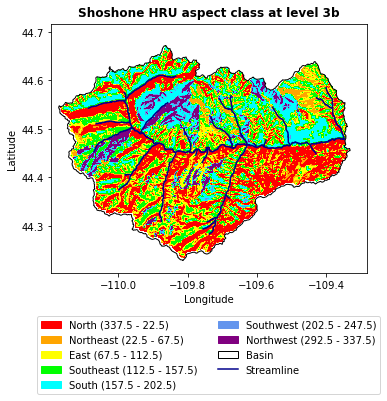

In [17]:
for level in level_list:

    print('--- Complexity level %s ---' %(level))

    hru_str = 'hru'+'_lev' + str(level)
    hru_elmn_str = hru_str+'_elmn'   
    hru_vector_elmn = os.path.join(domain_path, hru_elmn_str+'.shp')  

    hru_aspect_raster = os.path.join(domain_path, os.path.basename(hru_vector_elmn).split('.shp')[0]+'_attrb_aspect.tif') 
    aspect_class_raster = os.path.join(domain_path, os.path.basename(hru_aspect_raster).split('.tif')[0]+'_class.tif')        
    
    # plot classified aspect
    title = '%s HRU aspect class at level %s'%(domain_name.capitalize(),level)
    ofile = os.path.join(domain_path, 'plot', '%s_aspect_class.png'%(hru_elmn_str))   
    
    inraster,bound_vector,stream_vector,wgs_crs,cmap_str,input_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile=\
    aspect_class_raster,domain_gru_prj_shp,domain_stream_shp,wgs_crs,'user',legend_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile
    
    gp.plot_raster_and_bound_stream(inraster,bound_vector,stream_vector,wgs_crs,cmap_str,input_dict,
                                    figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)
